# Proyecto de Análisis de Datos de Propiedades en Argentina

## **Introducción**
En este proyecto, se analizará un conjunto de datos sobre propiedades en Argentina. El objetivo es realizar un análisis exploratorio de los datos y extraer información relevante sobre el mercado inmobiliario en el país.

El conjunto de datos utilizado proviene de [Kaggle](https://www.kaggle.com/datasets/juanmartnrodrguez/argentina-dataset-propiedades) y contiene información detallada sobre las características de las propiedades, como ubicación, precio, cantidad de habitaciones, superficie, entre otros.

A través del análisis de estos datos, buscamos obtener insights valiosos y recomendaciones para comprender mejor el mercado inmobiliario. Además, buscaremos poder predecir el precio de una propiedad conociendo sus diferentes características

### Abstracto

En este proyecto, se aborda el desafío de predecir el precio de las propiedades en Argentina utilizando técnicas de data science. Cabe mencionar que el dataset tiene la limitación de contener información únicamente del año 2020 y 2021.

El objetivo principal de este proyecto es construir un modelo predictivo que pueda estimar el precio de una propiedad en base a sus características. Para lograr esto, se realizará un análisis exploratorio de los datos, se limpiarán y transformarán según sea necesario, y se aplicarán técnicas de data science para construir un modelo predictivo sólido.

Al obtener resultados confiables en la predicción del precio de las propiedades, se podrán tomar decisiones más informadas en el mercado inmobiliario argentino. Esto beneficiará tanto a los compradores y vendedores de propiedades como a los profesionales del sector.

A lo largo de este notebook, se abordarán diferentes aspectos del conjunto de datos, incluyendo la exploración de variables relevantes, la detección de patrones y relaciones, y la generación de recomendaciones basadas en los insights obtenidos.

Argentina es un país con una economía caracterizada por altos niveles de inflación. Esta situación económica puede tener un impacto significativo en el mercado inmobiliario y en los precios de las propiedades. En estos años la inflación aumentó de manera abismal, por lo que estos precios podrán haber quedado muy desactualizados. Más allá de eso, puede ser muy interesante realizar un análisis predictivo para esa época


### Preguntas/Hipótesis

Este proyecto se enfocará en encontrar las características que más influyen en el precio para luego tener la capacidad de predecirlo.

1. **Pregunta:** ¿Cuál es la característica que tiene la mayor correlación con el precio de una propiedad?
   
   **Hipótesis:** Se plantea que una de las características, como el tamaño del terreno, el tamaño construido, el número de habitaciones, la cantidad de baños o alguna otra, tendrá una correlación más fuerte con el precio de una propiedad. La hipótesis busca identificar qué característica tiene la mayor influencia en el precio.

2. **Pregunta:** ¿Hay características que, a pesar de ser relevantes en el precio, no tienen una relación lineal con él?
   
   **Hipótesis:** Se plantea que algunas características, podrían tener un impacto significativo en el precio, pero su relación con él no seguirá una tendencia lineal. Por lo tanto, esta hipótesis busca identificar si existen características no lineales que también tengan un efecto notable en el precio de las propiedades.

Estas preguntas adicionales nos permitirán explorar más a fondo las características que influyen en el precio de las propiedades en Argentina y determinar cuál de ellas tiene el mayor impacto. Al responder a estas preguntas, podremos comprender mejor qué características son las más relevantes y cómo interactúan entre sí para determinar el precio final de una propiedad en Argentina.


## **Exploratory Data Analysis (EDA)**

In [ ]:
# Importación de librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración para visualización
sns.set_style("whitegrid")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 2. Carga del conjunto de datos
df = pd.read_csv('/content/drive/MyDrive/CoderHouse/DataScience/ar_properties.csv')


In [ ]:
# Inspección inicial
df.head(3)  # Visualización de las primeras filas del dataset

id    ad_type  start_date    end_date  created_on  \
0  wdQ5hWhv8P14T7Sh9g4QCg==  Propiedad  2020-12-25  9999-12-31  2020-12-25   
1  nnMBYZ4RMRY+vm753EtA+g==  Propiedad  2020-12-25  9999-12-31  2020-12-25   
2  +dnVA1K6JxzL1zAjOEQ1pA==  Propiedad  2020-12-25  2020-12-29  2020-12-25   

         lat        lon         l1                      l2        l3  ...  \
0 -32.716652 -68.642692  Argentina                 Mendoza       NaN  ...   
1 -24.797723 -65.467514  Argentina                   Salta       NaN  ...   
2 -34.919373 -58.020591  Argentina  Bs.As. G.B.A. Zona Sur  La Plata  ...   

  bathrooms surface_total  surface_covered  price  currency  price_period  \
0       NaN         350.0            350.0    NaN       NaN           NaN   
1       NaN        1541.0           1541.0    NaN       NaN       Mensual   
2       NaN        1000.0           1000.0    NaN       NaN       Mensual   

                                               title  \
0                     Excelentes Lotes Sobre Ruta 34   
1  TERRENO + VENTA + JARDINES DE SAN LORENZO +150...   
2               Lote en Venta de 1000 m2 en La Plata   

                                         description  property_type  \
0  Corredor Responsable: VICTOR E. MONTIVERO - C....           Lote   
1  Corredor Responsable: Pablo Castañeda - C.U.C....           Lote   
2  Corredor Responsable: Rico Sebastián - Martill...           Lote   

  operation_type  
0          Venta  
1          Venta  
2          Venta  

[3 rows x 25 columns]

Variable 'id', 'title' y 'description' no contienen información relevante

In [ ]:
df.info() # Información del dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 25 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   id               1000000 non-null  object 
 1   ad_type          1000000 non-null  object 
 2   start_date       1000000 non-null  object 
 3   end_date         1000000 non-null  object 
 4   created_on       1000000 non-null  object 
 5   lat              849189 non-null   float64
 6   lon              848255 non-null   float64
 7   l1               1000000 non-null  object 
 8   l2               1000000 non-null  object 
 9   l3               946673 non-null   object 
 10  l4               239496 non-null   object 
 11  l5               5001 non-null     object 
 12  l6               0 non-null        float64
 13  rooms            526423 non-null   float64
 14  bedrooms         466213 non-null   float64
 15  bathrooms        776733 non-null   float64
 16  surface_total    37

Variable 'l6' no contiene valores por lo que será eliminada. Se analizará acción a tomar con valores nulos

In [ ]:
df.columns

Index(['id', 'ad_type', 'start_date', 'end_date', 'created_on', 'lat', 'lon',
       'l1', 'l2', 'l3', 'l4', 'l5', 'l6', 'rooms', 'bedrooms', 'bathrooms',
       'surface_total', 'surface_covered', 'price', 'currency', 'price_period',
       'title', 'description', 'property_type', 'operation_type'],
      dtype='object')

In [ ]:
df.describe()

lat            lon   l6          rooms       bedrooms  \
count  849189.000000  848255.000000  0.0  526423.000000  466213.000000   
mean      -34.790048     -59.256701  NaN       2.861982       2.104534   
std         2.957449       2.638051  NaN       1.689448       2.399252   
min       -54.841484    -119.699390  NaN       1.000000     -16.000000   
25%       -34.919952     -58.746835  NaN       2.000000       1.000000   
50%       -34.611445     -58.448442  NaN       3.000000       2.000000   
75%       -34.456179     -58.172063  NaN       4.000000       3.000000   
max        85.051129      -1.981231  NaN      40.000000     900.000000   

           bathrooms  surface_total  surface_covered         price  
count  776733.000000  379501.000000     3.814510e+05  9.630980e+05  
mean        1.707951     514.889481     6.123054e+03  3.285948e+05  
std         1.080390    4372.302647     3.477565e+06  1.192329e+07  
min         1.000000    -136.000000    -1.300000e+02  0.000000e+00  
25%         1.000000      50.000000     4.500000e+01  4.200000e+04  
50%         1.000000      95.000000     7.600000e+01  9.800000e+04  
75%         2.000000     255.000000     1.640000e+02  2.100000e+05  
max        20.000000  200000.000000     2.147484e+09  1.000000e+10

Valores irreales (negativos o extremos). Se analizará acción a tomar

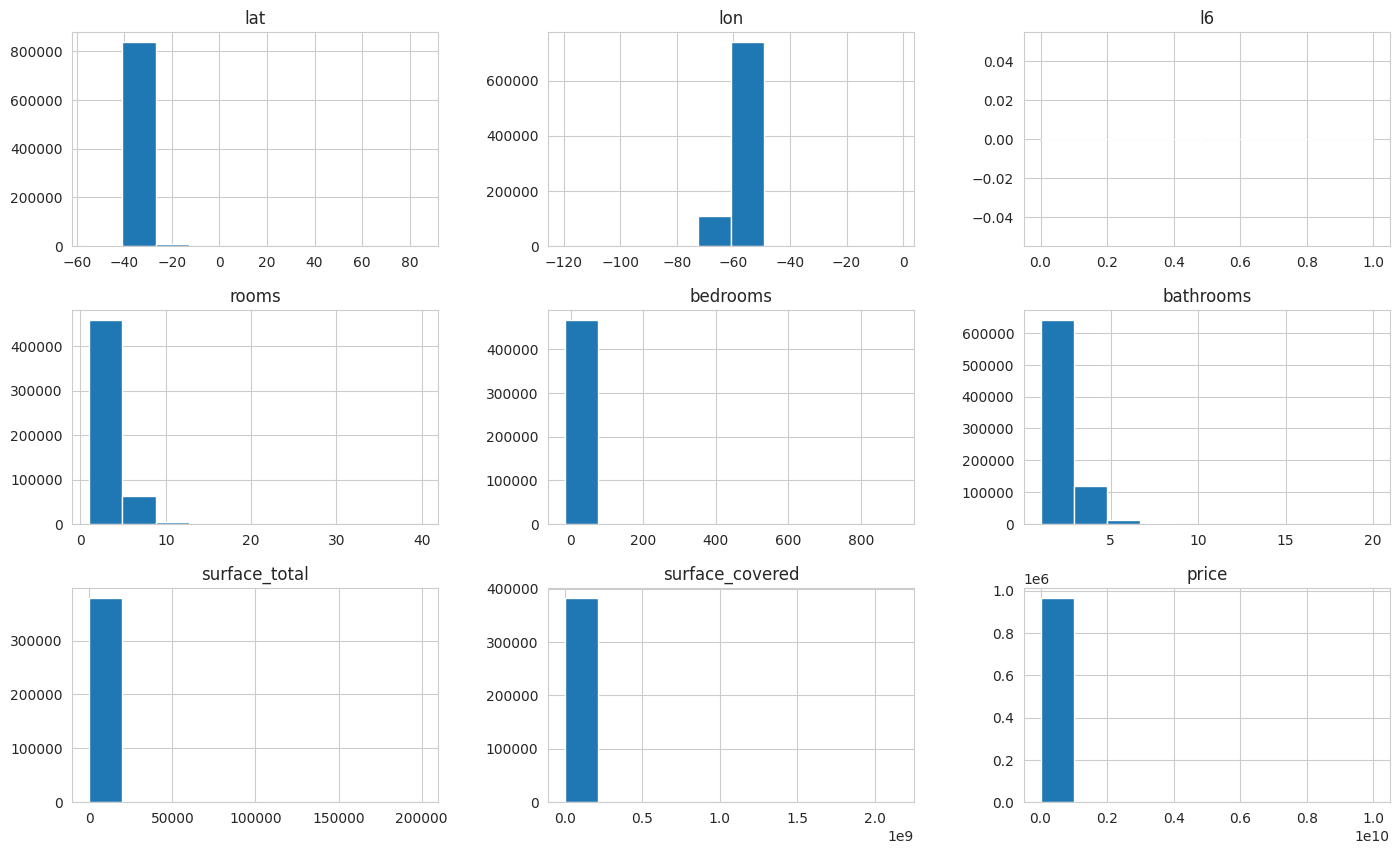

In [ ]:
df.hist(figsize=(17,10))
plt.show()

#### **Se puede analizar algunas cuestiones:**

    - Contiene un millón de datos. Se pueden eliminar filas para reducir el tamaño del dataset y poder trabajar más rápido
    - 25 columnas de las cuales algunas no son relevantes para el análisis
    - Algunas de sus variables presentan una gran cantidad de valores nulos o sin sentido

#### Al haber tantos valores, se deduce que el trabajo requiere una gran limpieza de datos

## **Data Wrangling**

In [ ]:
# Eliminar columna 'l6 que no contiene valores
df = df.drop(['l6'], axis=1, errors='ignore')

# Eliminar valores faltantes en la columna 'price'
df = df[df['price'].notnull() == True]

# Verificar tamaño del dataset restante
df.shape

(963098, 24)

##### Información de variables

In [ ]:
# Valores de la columna 'ad_type'
df['ad_type'].value_counts()

Propiedad    963098
Name: ad_type, dtype: int64

Contiene un solor valor así que se elimina la columna

In [ ]:
# Eliminar columna 'ad_type'
df = df.drop('ad_type', axis=1, errors='ignore')


In [ ]:
# Valores de la columna 'operation_type'
print(df['operation_type'].value_counts(normalize=True))
df['operation_type'].value_counts()

Venta                0.784886
Alquiler             0.184071
Alquiler temporal    0.031044
Name: operation_type, dtype: float64


Venta                755922
Alquiler             177278
Alquiler temporal     29898
Name: operation_type, dtype: int64

Se elimina 'Alquiler temporal' ya que contiene pocos datos y alivianar el dataset

In [ ]:
# Eliminar filas en las que la variable 'operation_type' sea 'Alquiler temporal'
df = df[~(df['operation_type'] == 'Alquiler temporal')]


In [ ]:
# Valores y cantidad de la columna 'l1'
df['l1'].value_counts()

Argentina         921386
Uruguay            11056
Estados Unidos       671
Brasil                87
Name: l1, dtype: int64

Se eliminan todos los valores fuera de Argentina y luego se elimina la columna 'l1'

In [ ]:
# Eliminar propiedades que no sean de Argentina y eliminar la variable 'l1'
df = df[df['l1'] == 'Argentina']
df = df.drop('l1', axis=1)

In [ ]:
df['property_type'].value_counts() # Valores y cantidad de la columna 'property_type'

Departamento       337813
Otro               235701
Casa               164751
Lote                77573
PH                  33526
Local comercial     31807
Oficina             24873
Cochera              8015
Depósito             6043
Casa de campo        1284
Name: property_type, dtype: int64

Se toman en cuenta simplemente los departamentos, casas y PHs ya que algunas variables no tienen sentido para las demás propiedades

In [ ]:
# Quedarse solo con las propiedades que sean departamentos, casas o ph
df = df[(df['property_type'] == 'Departamento') | (
    df['property_type'] == 'Casa') | (df['property_type'] == 'PH')]


In [ ]:
# Nulos en variable 'currency'
print(df.currency.isnull().sum())

# Valores y cantidad de la columna 'currency'
df['currency'].value_counts()

848


USD    419277
ARS    115795
PEN       170
Name: currency, dtype: int64

Se eliminan valores tomados en moneda peruana y valores faltantes

In [ ]:
# Quedarse solo con propiedades en pesos o dólares
df = df.loc[(df['currency'] == 'ARS') | (df['currency'] == 'USD')] # Nuevo df solo con monedas: 'ARS' y 'USD'


In [ ]:
# Chequear duplicados
df[df.duplicated(subset=None)]

Empty DataFrame
Columns: [id, start_date, end_date, created_on, lat, lon, l2, l3, l4, l5, rooms, bedrooms, bathrooms, surface_total, surface_covered, price, currency, price_period, title, description, property_type, operation_type]
Index: []

[0 rows x 22 columns]

No hay datos duplicados en el dataset. Se investigará si sacando la variable 'id' se encuentran datos repetidos.

In [ ]:
# Chequear duplicados luego de eliminar la variable 'id'
col = df.drop('id', axis=1, errors='ignore')
duplicados = df[col.duplicated(subset=col.columns)]
duplicados

id  start_date    end_date  created_on  \
43      UClZDZjF9Z4lOhP85mQSfA==  2020-12-25  2020-12-25  2020-12-25   
44      zTUNOcXYK6YS09xF4/3GYQ==  2020-12-25  2020-12-25  2020-12-25   
1059    tPaM266SjC+0ECaP3CBtCw==  2021-01-01  9999-12-31  2021-01-01   
1109    raUWyJb05ATWGWfVqppkyg==  2021-01-01  9999-12-31  2021-01-01   
1186    Xu7z0i7uHa2xnILKT0zRzw==  2021-01-01  2021-01-13  2021-01-01   
...                          ...         ...         ...         ...   
998238  TFV9QkQO2imC/RHlwMaGuw==  2020-05-12  2020-11-26  2020-05-12   
999407  tavYa+m5HLdpEQ0mjwzQlw==  2020-05-12  2020-05-20  2020-05-12   
999422  jHaSNnXsUykqRszEJWnaYw==  2020-05-12  2020-05-20  2020-05-12   
999632  ExAsZ2eX+4NXGQIC8arX9g==  2020-05-12  2020-05-20  2020-05-12   
999666  kF3r3+TVD4yY25x0t8jKng==  2020-05-12  2020-11-13  2020-05-12   

              lat        lon                        l2                  l3  \
43     -31.427785 -64.190612                   Córdoba             Córdoba   
44     -31.427785 -64.190612                   Córdoba             Córdoba   
1059   -34.814775 -58.465234    Bs.As. G.B.A. Zona Sur  Esteban Echeverría   
1109   -34.544221 -58.547588  Bs.As. G.B.A. Zona Norte  General San Martín   
1186   -34.658966 -58.618633  Bs.As. G.B.A. Zona Oeste               Morón   
...           ...        ...                       ...                 ...   
998238        NaN        NaN                   Córdoba             Córdoba   
999407 -34.610187 -58.423543           Capital Federal             Almagro   
999422 -34.575921 -58.421206           Capital Federal             Palermo   
999632 -34.402698 -58.663971  Bs.As. G.B.A. Zona Norte               Tigre   
999666        NaN        NaN  Bs.As. G.B.A. Zona Norte             Escobar   

                       l4                l5  ...  bathrooms  surface_total  \
43          Nueva Córdoba               NaN  ...        1.0            NaN   
44          Nueva Córdoba               NaN  ...        1.0            NaN   
1059         Monte Grande               NaN  ...        1.0            NaN   
1109      Villa Ballester               NaN  ...        1.0           90.0   
1186                Morón               NaN  ...        1.0           30.0   
...                   ...               ...  ...        ...            ...   
998238                NaN               NaN  ...        3.0            NaN   
999407                NaN               NaN  ...        2.0           65.0   
999422                NaN               NaN  ...        2.0          130.0   
999632           Nordelta  Barrio Los Lagos  ...        3.0          671.0   
999666  Haras Santa Maria               NaN  ...        3.0          250.0   

        surface_covered     price  currency  price_period  \
43                  NaN   15000.0       ARS       Mensual   
44                  NaN   15000.0       ARS       Mensual   
1059                NaN   26000.0       ARS       Mensual   
1109               40.0   90000.0       USD           NaN   
1186               28.0   14000.0       ARS       Mensual   
...                 ...       ...       ...           ...   
998238            186.0  410000.0       USD           NaN   
999407             62.0  123000.0       USD       Mensual   
999422            130.0    3300.0       USD       Mensual   
999632            220.0  410000.0       USD       Mensual   
999666            200.0  260000.0       USD       Mensual   

                                                    title  \
43      B° NUEVA CÓRDOBA – DPTO. EN ALQUILER – 1 DORMI...   
44      B° NUEVA CÓRDOBA – DPTO. EN ALQUILER – 1 DORMI...   
1059                          Departamento - Monte Grande   
1109              Departamento de 2 ambientes con terraza   
1186      Departamento de un ambiente en alquiler, Morón.   
...                                                   ...   
998238  Vilanova villa Belgrano deptos en venta / alqu...   
999407    Departamento de 3 ambientes en Venta en Almagro   
999422  U

Hay 8269 instancias que, con excepción de la 'id', contienen valores repetidos. Se eliminan las repeticiones y ya la columna 'id' no sirve así que también se quita del dataframe

In [ ]:
# Nuevo dataframe sin valores repetidos y drop columna 'id'
df = df.drop_duplicates(subset=col.columns)
df = df.drop('id', axis=1, errors='ignore')


In [ ]:
# Chequear si la columna 'start_date' es igual a la columna 'created_on'
df[df['start_date'] != df['created_on']]

Empty DataFrame
Columns: [start_date, end_date, created_on, lat, lon, l2, l3, l4, l5, rooms, bedrooms, bathrooms, surface_total, surface_covered, price, currency, price_period, title, description, property_type, operation_type]
Index: []

[0 rows x 21 columns]

Son iguales por lo tanto se elimina la columna 'created_on'

In [ ]:
# Eliminar variable 'created on' del dataframe
df = df.drop('created_on', axis=1, errors='ignore')

In [ ]:
# Cantidad de valores en 'l4'
df['l4'].value_counts()

Nordelta                               11334
La Plata                                6316
Adrogué                                 5195
Centro                                  4713
Banfield                                4066
                                       ...  
Rauch                                      1
Los Pinos                                  1
Barrio Cerrado "California Village"        1
Barrio Cerrado Malibú                      1
Barrio Cerrado "Pilar House"               1
Name: l4, Length: 849, dtype: int64

Se puede presenciar que las variables que comienzan con la letra 'l' se refieren a la ubicación. Y mientras el número es más alto, más específica es la ubicación. El objetivo de este proyecto requiere ubicaciones más generales, así que se tomarán en cuenta solo 'l2' y 'l3'

In [ ]:
# Eliminar variables 'l2' y 'l3'
df = df.drop(['l4', 'l5'], axis=1, errors='ignore')

In [ ]:
# Chequear cantidad de nulos por variable
df.isnull().sum()

start_date              0
end_date                0
lat                 63112
lon                 63773
l2                      0
l3                  16773
rooms              104444
bedrooms           150196
bathrooms           36400
surface_total      272622
surface_covered    248197
price                   0
currency                0
price_period       354852
title                   0
description             7
property_type           0
operation_type          0
dtype: int64

Se investiga acción a realizar para los valores faltantes en 'rooms', 'bedrooms','bathrooms','surface_total' y 'surface_covered'

In [ ]:
# Proporción de nulos en cada variable
df.isnull().mean().round(4)*100

start_date          0.00
end_date            0.00
lat                11.98
lon                12.11
l2                  0.00
l3                  3.18
rooms              19.83
bedrooms           28.51
bathrooms           6.91
surface_total      51.75
surface_covered    47.11
price               0.00
currency            0.00
price_period       67.36
title               0.00
description         0.00
property_type       0.00
operation_type      0.00
dtype: float64

En un principio se analizó rellenar los valores faltantes de las variables 'rooms', 'bedrooms' y 'bathrooms' de la siguiente manera:

  - Para cada valor donde una variable es nula y las demás no, cambiar ese nulo por la mediana de ese valor cuando ninguna es nula.
  - Por ejemplo, si cuando 'rooms' = 1 y 'bathrooms'= 1 la mediana de la variable 'bedrooms' = 1, se cambian los valores NaN de la variable 'bedrooms' por 1

Finalmente se decidió eliminar las filas con valores faltantes ya que estos representan gran parte del dataset y modificar sus valores manualmente no parece lo correcto. Además, gracias a la gran dimensión del dataset, aunque se eliminen los nulos sigue teniendo un tamaño suficiente

In [ ]:
# Eliminar las filas en las que las variables 'rooms', 'bedrooms' o 'bathrooms' son nulos
df = df.dropna(subset=['rooms', 'bedrooms', 'bathrooms'])

In [ ]:
# Verificar proporción de nulos para cada variable
df.isnull().mean().round(4)*100 # Proporción de nulos en cada variable

start_date          0.00
end_date            0.00
lat                10.01
lon                10.22
l2                  0.00
l3                  2.56
rooms               0.00
bedrooms            0.00
bathrooms           0.00
surface_total      47.51
surface_covered    45.02
price               0.00
currency            0.00
price_period       64.62
title               0.00
description         0.00
property_type       0.00
operation_type      0.00
dtype: float64

Para las variables de superficie se decide eliminar las filas cuyos valores son nulos ya que son casi la mitad del dataset. El dataset sigue siendo suficientemente grande

In [ ]:
# Eliminar las filas en las que las variables 'surface_total' o 'surface_covered' son nulos
df = df.dropna(subset=['surface_total', 'surface_covered'])


In [ ]:
df.isnull().mean().round(4)*100 # Proporción de nulos en cada variable

start_date          0.00
end_date            0.00
lat                 9.08
lon                 9.08
l2                  0.00
l3                  1.19
rooms               0.00
bedrooms            0.00
bathrooms           0.00
surface_total       0.00
surface_covered     0.00
price               0.00
currency            0.00
price_period       49.32
title               0.00
description         0.00
property_type       0.00
operation_type      0.00
dtype: float64

##### Inspección de valores irreales

In [ ]:
# Estadísticas de variables numéricas del dataset
df.describe().T

count           mean           std        min  \
lat              147789.0     -34.454581  1.299723e+00 -54.801912   
lon              147789.0     -59.078967  2.029272e+00 -72.264798   
rooms            162553.0       3.243231  1.554126e+00   1.000000   
bedrooms         162553.0       2.092358  1.124575e+00  -1.000000   
bathrooms        162553.0       1.617251  9.297826e-01   1.000000   
surface_total    162553.0     198.761093  1.986399e+03  10.000000   
surface_covered  162553.0     127.647887  1.357367e+03  -2.000000   
price            162553.0  355223.325291  1.771209e+06  54.000000   

                          25%            50%            75%           max  
lat                -34.620010     -34.589296     -34.514196 -2.205063e+01  
lon                -58.630216     -58.459008     -58.412785 -5.405037e+01  
rooms                2.000000       3.000000       4.000000  3.200000e+01  
bedrooms             1.000000       2.000000       3.000000  3.300000e+01  
bathrooms            1.000000       1.000000       2.000000  1.600000e+01  
surface_total       52.000000      79.000000     150.000000  1.942730e+05  
surface_covered     47.000000      70.000000     120.000000  2.350000e+05  
price            65000.000000  130000.000000  239900.000000  1.005480e+08

Variables 'bedrooms', 'surface_total', 'surface_covered' y 'price' con valores sin sentido

In [ ]:
# Cambiar los valores negativos de la variable 'bedrooms' a su valor positivo
df['bedrooms'] = df['bedrooms'].abs()

In [ ]:
# Eliminar instancias cuya superficie total sea menor a 15 metros cuadrados
df = df[~(df['surface_total'] < 15)]

In [ ]:
# Eliminar instancias cuya superficie cubierta sea menor a 15 metros cuadrados
df = df[~(df['surface_covered'] < 15)]

In [ ]:
# Eliminar instancias cuyo precio es menor a 50 ya que son valores muy bajos para ser reales
df = df[df['price'] > 50]

Además hay valores excesivamente grandes que no parecen ser reales y no van a permitir apreciar los gráficos.

El tercer cuartil de la variable precio es 239900. El máximo es demasiado más grande que eso. Se elige un valor como límite para reducir el dataset. Lo mismo se hace con las variables de superficie

In [ ]:
# Eliminar filas donde el precio es mayor a un millón
df = df[df['price'] < 1000000]

# Eliminar filas donde la superficie cubierta sea mayor a mil
df = df[df['surface_covered'] < 1000]

# Eliminar filas donde la superficie total sea mayor a mil
df = df[df['surface_total'] < 1000]

In [ ]:
# Información del dataset restante
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 154793 entries, 36 to 999979
Data columns (total 18 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   start_date       154793 non-null  object 
 1   end_date         154793 non-null  object 
 2   lat              140978 non-null  float64
 3   lon              140978 non-null  float64
 4   l2               154793 non-null  object 
 5   l3               153015 non-null  object 
 6   rooms            154793 non-null  float64
 7   bedrooms         154793 non-null  float64
 8   bathrooms        154793 non-null  float64
 9   surface_total    154793 non-null  float64
 10  surface_covered  154793 non-null  float64
 11  price            154793 non-null  float64
 12  currency         154793 non-null  object 
 13  price_period     79139 non-null   object 
 14  title            154793 non-null  object 
 15  description      154793 non-null  object 
 16  property_type    154793 non-null  obj

In [ ]:
# Valores y cantidad de la columna 'price_period'
df['price_period'].value_counts()

Mensual    79139
Name: price_period, dtype: int64

In [ ]:
# Filtrar df cuando 'price_period' sea nulo y la operación 'Alquiler'
df[(df['price_period'].notnull() == False) & (df['operation_type'] == 'Alquiler')]

start_date    end_date        lat        lon  \
36      2020-12-25  2021-01-08 -34.591216 -58.406686   
37      2020-12-25  2021-01-08 -34.637904 -58.502219   
41      2020-12-25  2021-01-05 -34.720874 -58.278099   
45      2020-12-25  2021-01-02 -34.591263 -58.410973   
46      2020-12-25  2020-12-29 -38.946141 -68.049174   
...            ...         ...        ...        ...   
997422  2020-05-12  2020-06-29 -34.590530 -58.402662   
997442  2020-05-12  2020-05-24 -34.615601 -58.362933   
997490  2020-05-12  2020-06-08 -32.963560 -60.696344   
997590  2020-05-12  2020-05-19 -32.946130 -60.714907   
997656  2020-05-12  2020-07-09 -34.447314 -58.632429   

                              l2             l3  rooms  bedrooms  bathrooms  \
36               Capital Federal       Recoleta    1.0       1.0        1.0   
37               Capital Federal     Villa Luro    1.0       1.0        1.0   
41        Bs.As. G.B.A. Zona Sur        Quilmes    2.0       1.0        1.0   
45               Capital Federal       Recoleta    2.0       1.0        1.0   
46                       Neuquén    Confluencia    2.0       1.0        1.0   
...                          ...            ...    ...       ...        ...   
997422           Capital Federal   Barrio Norte    2.0       1.0        1.0   
997442           Capital Federal  Puerto Madero    2.0       1.0        2.0   
997490                  Santa Fe        Rosario    5.0       2.0        1.0   
997590                  Santa Fe        Rosario    4.0       3.0        1.0   
997656  Bs.As. G.B.A. Zona Norte          Tigre    6.0       5.0        4.0   

        surface_total  surface_covered     price currency price_period  \
36               17.0             17.0   15000.0      ARS          NaN   
37               38.0             36.0   24000.0      ARS          NaN   
41               45.0             45.0   16000.0      ARS          NaN   
45               39.0             38.0   21000.0      ARS          NaN   
46               60.0             58.0   55000.0      ARS          NaN   
...               ...              ...       ...      ...          ...   
997422           33.0             31.0   23000.0      ARS          NaN   
997442           70.0             64.0   55000.0      ARS          NaN   
997490           80.0             72.0    9000.0      ARS          NaN   
997590          280.0             75.0   15000.0      ARS          NaN   
997656          870.0            303.0  110000.0      ARS          NaN   

                                                    title  \
36              Monoambiente en alquiler en Recoleta CABA   
37           Alquiler Monoambiente Villa Luro + Amenities   
41             ALQUILER. DPTO 2 AMB. CON COCHERA. QUILMES   
45      Alquiler Departamento 2 ambientes,Interno Reco...   
46                   DEPARTAMENTO UN DORMITORIO AMUEBLADO   
...                                                   ...   
997422  ALQUILER TEMPORAL 2 AMBIENTES BARRIO NORTE EXC...   
997442  Departamento en Alquiler con Vista al Dique!! ...   
997490  ALQUILO CASA DOS DORMITORIOS AMENÁBART 5400 IN...   
997590       Alquiler, casa 3 dormitorios en B° Belgrano.   
997656  ALQUILER CASA SANTA BARBARA 6 AMBIENTES CON PI...   

                                              description property_type  \
36      Corredor Responsable: Daniel Acosta - CUCICBA ...  Departamento   
37      Corredor Responsable: Marcelo Trujillo - CUCIC...  Departamento   
41      Corredor Responsable: Martin Veltri - C.M.Q. 8...  Departamento   
45      Corredor Responsable: MARIANO AUFSEHER - CPI 4...  Departamento   
46      Corredor Responsable: SEBASTIAN BONIFACIO - N°...  Departamento   
...                                                   ...           ...   
997422  Hermoso y acogedor 2 ambientes para alquiler t...  Departamento   
997442  Unico Depto Dos Ambientes con Cochera en Lumie...  Departamento   
997490  CASA DE 2 DORMITORIOS EN ALQUILER      INTERNA...          Casa   
997590  Alquil

Se elimina la variable directamente. Por los precios vistos, se puede asumir un período mensual para los alquileres

In [ ]:
# Eliminar variable 'price_period'
df = df.drop('price_period', axis=1, errors='ignore')

In [ ]:
# Información del dataset restante
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 154793 entries, 36 to 999979
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   start_date       154793 non-null  object 
 1   end_date         154793 non-null  object 
 2   lat              140978 non-null  float64
 3   lon              140978 non-null  float64
 4   l2               154793 non-null  object 
 5   l3               153015 non-null  object 
 6   rooms            154793 non-null  float64
 7   bedrooms         154793 non-null  float64
 8   bathrooms        154793 non-null  float64
 9   surface_total    154793 non-null  float64
 10  surface_covered  154793 non-null  float64
 11  price            154793 non-null  float64
 12  currency         154793 non-null  object 
 13  title            154793 non-null  object 
 14  description      154793 non-null  object 
 15  property_type    154793 non-null  object 
 16  operation_type   154793 non-null  obj

Se eliminan las filas nulas restantes y luego las variables 'description' y 'title'





In [ ]:
# Eliminar nulos restantes
df = df.dropna(subset=['l3', 'lat','lon'])

# Eliminar variables 'description' y 'title'
df = df.drop(['title', 'description'], axis=1, errors='ignore')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139857 entries, 36 to 999979
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   start_date       139857 non-null  object 
 1   end_date         139857 non-null  object 
 2   lat              139857 non-null  float64
 3   lon              139857 non-null  float64
 4   l2               139857 non-null  object 
 5   l3               139857 non-null  object 
 6   rooms            139857 non-null  float64
 7   bedrooms         139857 non-null  float64
 8   bathrooms        139857 non-null  float64
 9   surface_total    139857 non-null  float64
 10  surface_covered  139857 non-null  float64
 11  price            139857 non-null  float64
 12  currency         139857 non-null  object 
 13  property_type    139857 non-null  object 
 14  operation_type   139857 non-null  object 
dtypes: float64(8), object(7)
memory usage: 17.1+ MB


De aquí en adelante, debido a que no se pueden juntar, se divide el dataset en dos. En alquiler y venta

In [ ]:
# Separación de datos en diferentes variables
alq = df.loc[df['operation_type'] == 'Alquiler']
venta = df.loc[df['operation_type'] == 'Venta']

In [ ]:
# Cantidad de valores para cada moneda en la tabla de alquileres
print(alq['currency'].value_counts())
alq['currency'].value_counts(normalize=True)


ARS    26045
USD     4417
Name: currency, dtype: int64


ARS    0.855
USD    0.145
Name: currency, dtype: float64

Para facilitar el análisis posterior, se eliminarán las filas en las que el alquiler esté en dólares

In [ ]:
# Nuevo dataset alquiler solo toma propiedades en pesos
alq = alq[alq['currency'] == 'ARS']

In [ ]:
# Revisar valores de la variable 'currency'
venta['currency'].value_counts()

USD    109310
ARS        85
Name: currency, dtype: int64

Para facilitar el análisis posterior, se eliminarán las filas en las que la venta esté en pesos

In [ ]:
# Nuevo dataset venta solo toma propiedades en dólares
venta = venta[venta['currency'] == 'USD']

In [ ]:
# Para gráficos generales del dataset, aún tenemos en cuenta el dataframe 'df', pero también eliminamos los alquileres en dólares y las ventas en pesos
df = df[((df['operation_type'] == 'Alquiler') & (df['currency'] == 'ARS'))
    | ((df['operation_type'] == 'Venta') & (df['currency'] == 'USD'))]


## **Visualizaciones**

### **Análisis Univariado**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135355 entries, 36 to 999979
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   start_date       135355 non-null  object 
 1   end_date         135355 non-null  object 
 2   lat              135355 non-null  float64
 3   lon              135355 non-null  float64
 4   l2               135355 non-null  object 
 5   l3               135355 non-null  object 
 6   rooms            135355 non-null  float64
 7   bedrooms         135355 non-null  float64
 8   bathrooms        135355 non-null  float64
 9   surface_total    135355 non-null  float64
 10  surface_covered  135355 non-null  float64
 11  price            135355 non-null  float64
 12  currency         135355 non-null  object 
 13  property_type    135355 non-null  object 
 14  operation_type   135355 non-null  object 
dtypes: float64(8), object(7)
memory usage: 16.5+ MB


In [ ]:
df['currency'].value_counts()

USD    109310
ARS     26045
Name: currency, dtype: int64

In [ ]:
df.groupby('currency').size()

currency
ARS     26045
USD    109310
dtype: int64

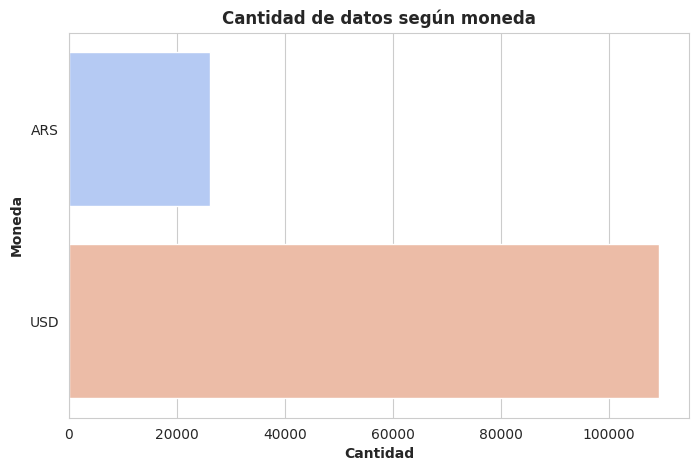

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(y=df.groupby('currency').size().index, x=df.groupby('currency').size().values, palette='coolwarm')
plt.title('Cantidad de datos según moneda', fontweight='bold')
plt.ylabel('Moneda', fontweight='bold')
plt.xlabel('Cantidad', fontweight='bold')
plt.show()

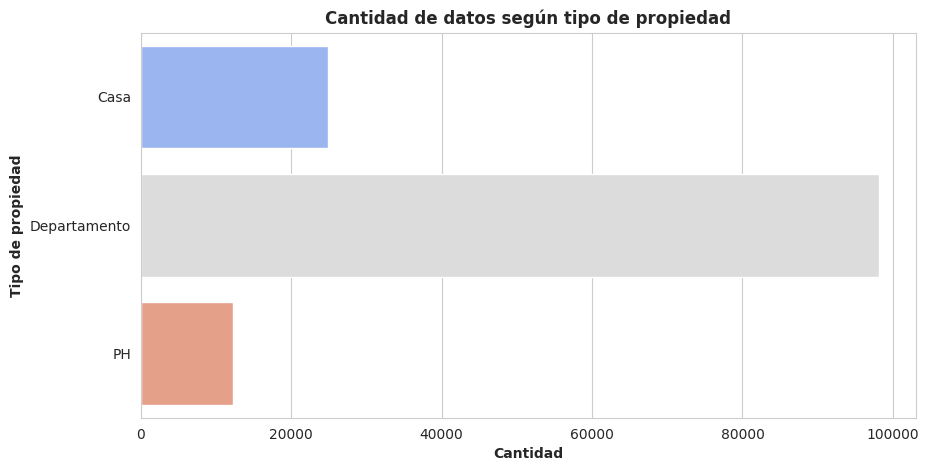

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(y=df.groupby('property_type').size().index, x=df.groupby('property_type').size().values, palette='coolwarm')
plt.title('Cantidad de datos según tipo de propiedad', fontweight='bold')
plt.ylabel('Tipo de propiedad', fontweight='bold')
plt.xlabel('Cantidad', fontweight='bold')
plt.show()

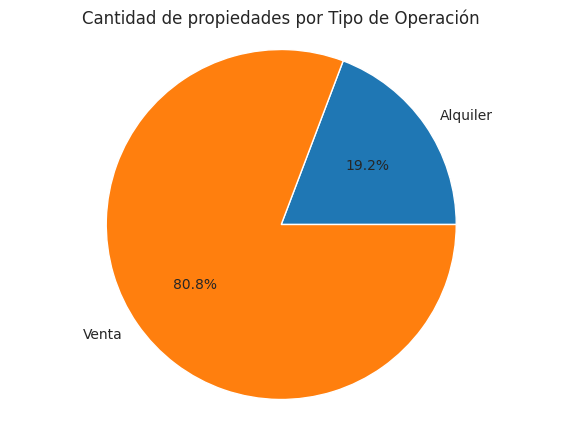

Venta       109310
Alquiler     26045
Name: operation_type, dtype: int64


In [ ]:
# Análisis de cantidad de datos de alquileres vs ventas
plt.figure(figsize=(7, 5))
plt.pie(df['operation_type'].value_counts().sort_index(),
        labels=df['operation_type'].unique(), autopct='%1.1f%%')
plt.axis('equal')
plt.title('Cantidad de propiedades por Tipo de Operación')
plt.show()
print(df.operation_type.value_counts())


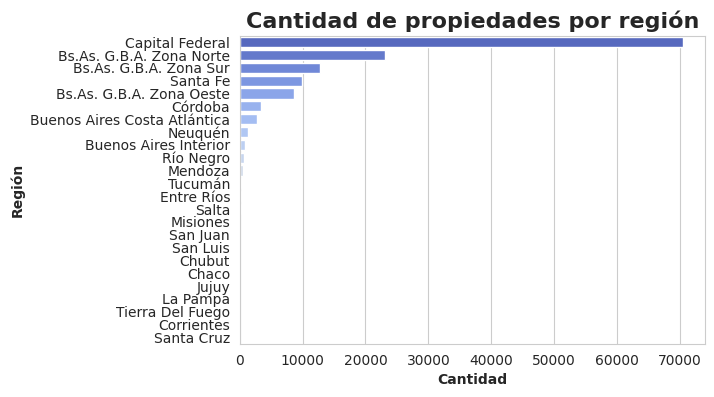

In [ ]:
plt.figure(figsize=(6, 4))
sns.barplot(data=df, x=df.l2.value_counts(),
            y=df.l2.value_counts().index, palette='coolwarm' )
plt.xlabel('Cantidad', fontweight='bold')
plt.ylabel('Región', fontweight='bold')
plt.title('Cantidad de propiedades por región', fontsize=16, fontweight='bold')
plt.show()


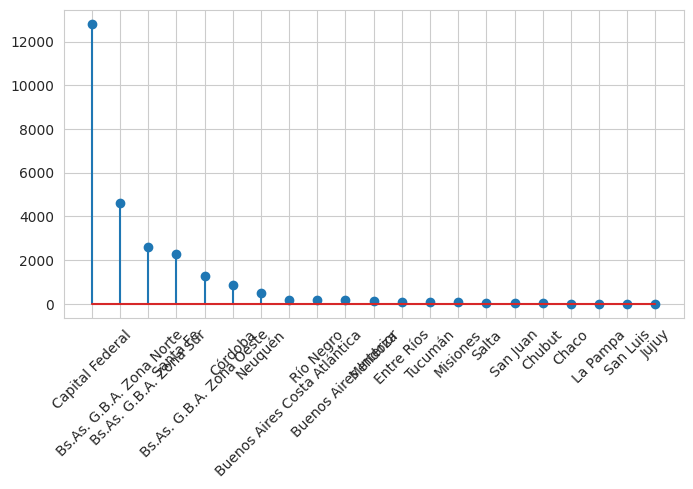

In [ ]:
plt.figure(figsize=(8, 4))
plt.stem(alq.l2.value_counts())
plt.xticks(range(0, alq.l2.unique().size),
           alq.l2.value_counts().index)
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Separación de provincias con una baja cantidad de datos
valores_rep_venta = venta['l2'].value_counts()[venta['l2'].value_counts() > 1000]
valores_rep_venta

Capital Federal                 57660
Bs.As. G.B.A. Zona Norte        18547
Bs.As. G.B.A. Zona Sur          10166
Santa Fe                         7673
Bs.As. G.B.A. Zona Oeste         7387
Buenos Aires Costa Atlántica     2473
Córdoba                          2412
Name: l2, dtype: int64

In [ ]:
# Separación de provincias con una baja cantidad de datos
valores_rep_alq = alq['l2'].value_counts()[alq['l2'].value_counts() > 600]
valores_rep_alq

Capital Federal             12803
Bs.As. G.B.A. Zona Norte     4609
Bs.As. G.B.A. Zona Sur       2623
Santa Fe                     2287
Bs.As. G.B.A. Zona Oeste     1276
Córdoba                       888
Name: l2, dtype: int64

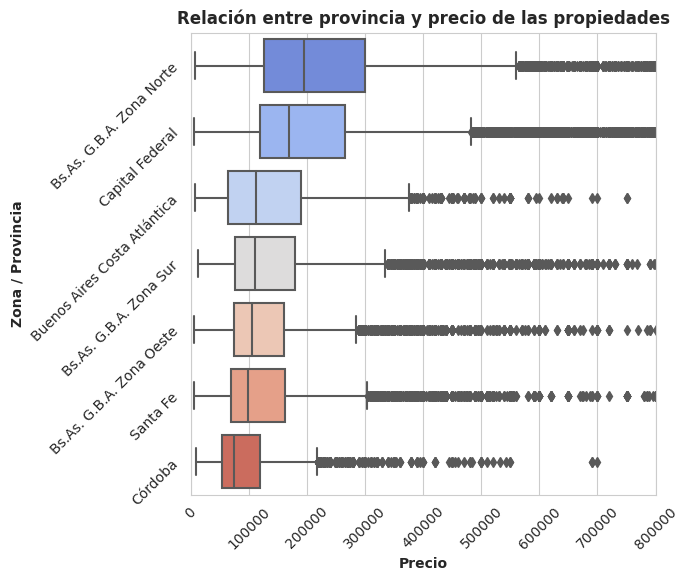

In [ ]:
# Gráficos y visualizaciones
order = venta[venta['l2'].isin(valores_rep_venta.index)].groupby('l2')[
    'price'].median().sort_values(ascending=False)

# Relación entre ubicación geográfica y precio
plt.figure(figsize=(6, 6))
sns.boxplot(y='l2', x='price',
            data=venta[venta['l2'].isin(valores_rep_venta.index)], order=list(order.index), palette='coolwarm')
plt.xlabel('Precio', fontweight='bold')
plt.ylabel('Zona / Provincia', fontweight='bold')
plt.title('Relación entre provincia y precio de las propiedades', fontweight='bold')
plt.xlim(0, 800000)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [ ]:
venta_caba = venta[venta['l2'] == 'Capital Federal']

# Separación de barrios con una baja cantidad de datos
valores_rep_caba = venta_caba['l3'].value_counts()[venta_caba['l3'].value_counts() > 800]

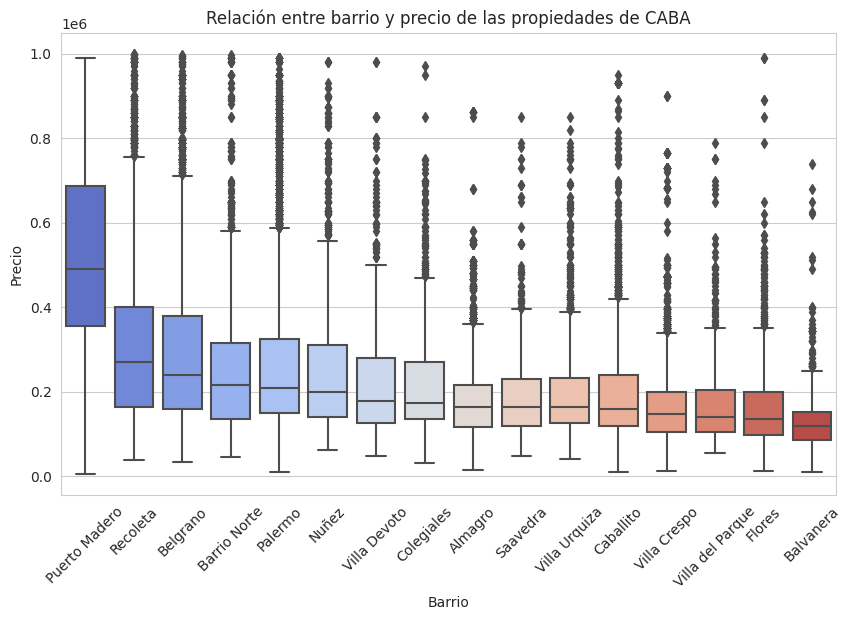

In [ ]:
# Relación entre barrio y precio
order = venta_caba[venta_caba['l3'].isin(valores_rep_caba.index)].groupby(
    'l3')['price'].median().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='l3', y='price', data=venta_caba[venta_caba['l3'].isin(valores_rep_caba.index)], order=order.index, palette='coolwarm')
ax.set(xlabel='Barrio', ylabel='Precio',
       title='Relación entre barrio y precio de las propiedades de CABA')
plt.xticks(rotation=45)
plt.show()

<ipython-input-95-503312e5c6c6>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x ='surface_total', palette='coolwarm')


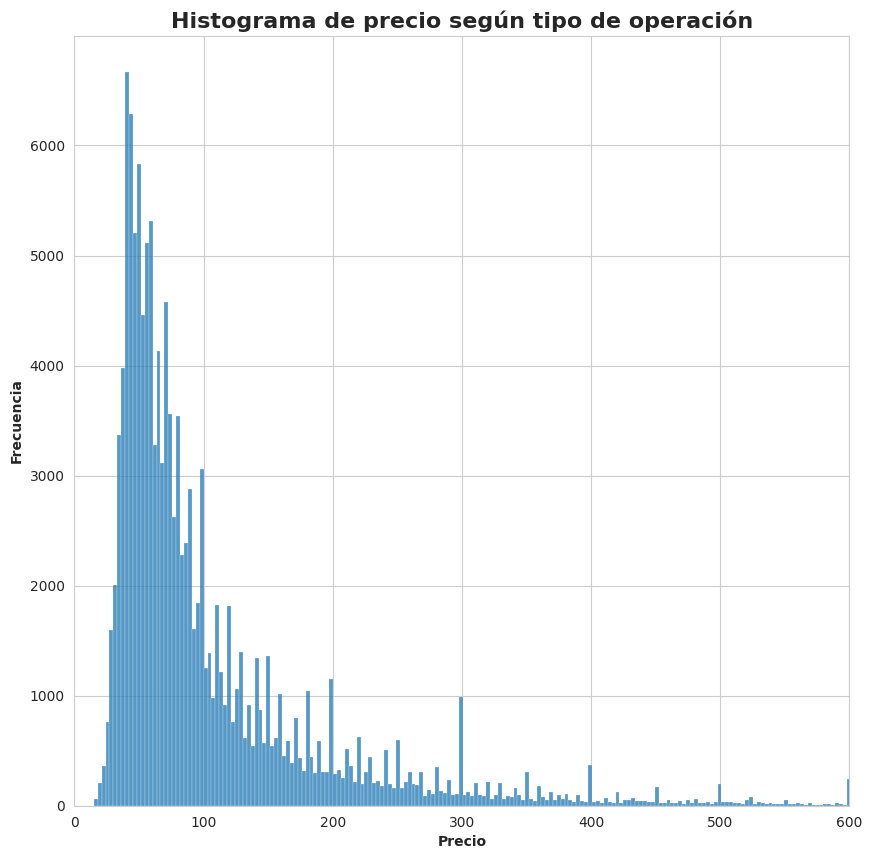

In [ ]:
plt.figure(figsize=(10,10))
sns.histplot(data=df, x ='surface_total', palette='coolwarm')
plt.title('Histograma de precio según tipo de operación', fontsize=16, fontweight='bold')
plt.xlim(0,600)
plt.xlabel('Precio', fontweight='bold')
plt.ylabel('Frecuencia', fontweight='bold')

# Configurar el formato de las etiquetas en el eje x
plt.ticklabel_format(style='plain', axis='x')

plt.show()

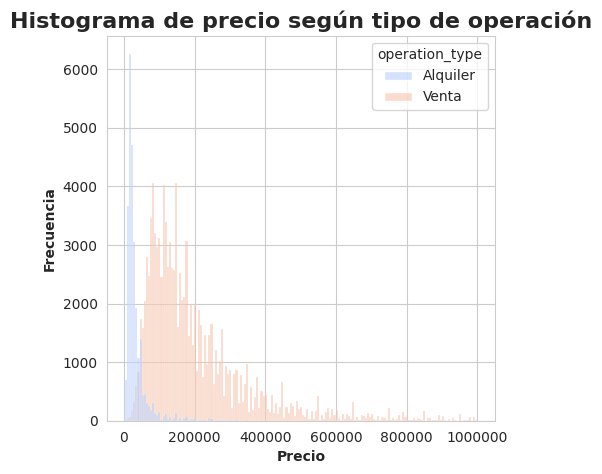

In [ ]:
plt.figure(figsize=(5,5))
sns.histplot(data=df, x ='price',hue='operation_type', palette='coolwarm')
plt.title('Histograma de precio según tipo de operación', fontsize=16, fontweight='bold')
plt.xlabel('Precio', fontweight='bold')
plt.ylabel('Frecuencia', fontweight='bold')

# Configurar el formato de las etiquetas en el eje x
plt.ticklabel_format(style='plain', axis='x')

plt.show()

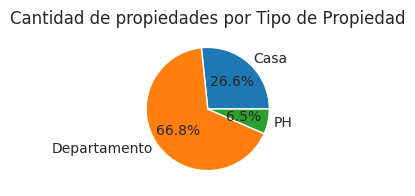

Departamento    142694
Casa             56914
PH               13975
Name: property_type, dtype: int64


In [ ]:
# Análisis de cantidad de datos de alquileres vs ventas
plt.figure(figsize=(10, 2))
plt.pie(df['property_type'].value_counts().sort_index(),
        labels=np.sort(df['property_type'].unique()), autopct='%1.1f%%')
# plt.axis('equal')
plt.title('Cantidad de propiedades por Tipo de Propiedad')
plt.show()
print(df.property_type.value_counts())

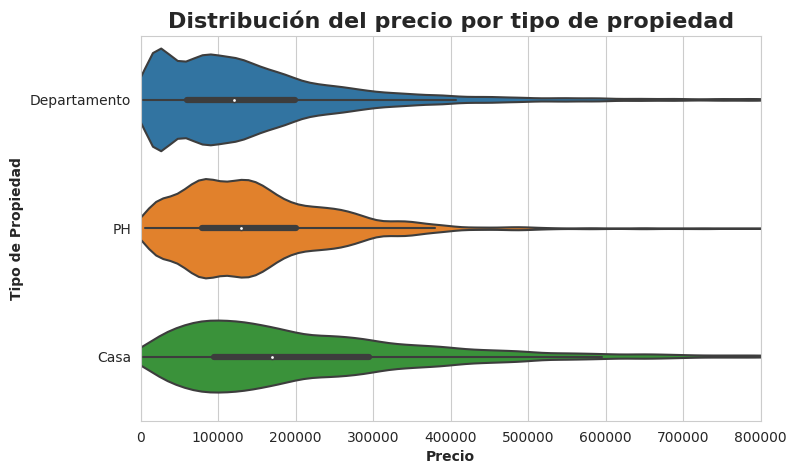

In [ ]:
plt.figure(figsize=(8,5))
sns.violinplot(data=df, x='price', y='property_type')
plt.xlabel('Precio', fontweight='bold')
plt.ylabel('Tipo de Propiedad', fontweight='bold')
plt.title('Distribución del precio por tipo de propiedad', fontsize=16, fontweight='bold')
plt.xlim(0, 800000)
plt.show()

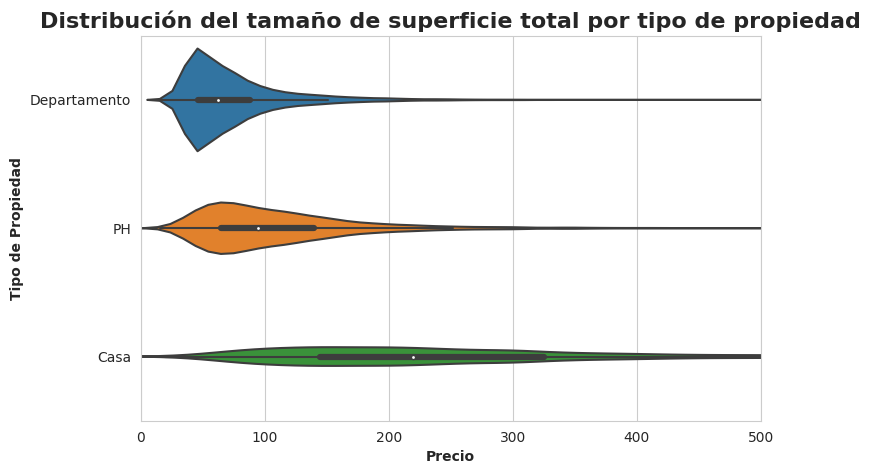

In [ ]:
plt.figure(figsize=(8,5))
sns.violinplot(data=df, x='surface_total', y='property_type')
plt.xlabel('Precio', fontweight='bold')
plt.ylabel('Tipo de Propiedad', fontweight='bold')
plt.title('Distribución del tamaño de superficie total por tipo de propiedad', fontsize=16, fontweight='bold')
plt.xlim(0, 500)
plt.show()

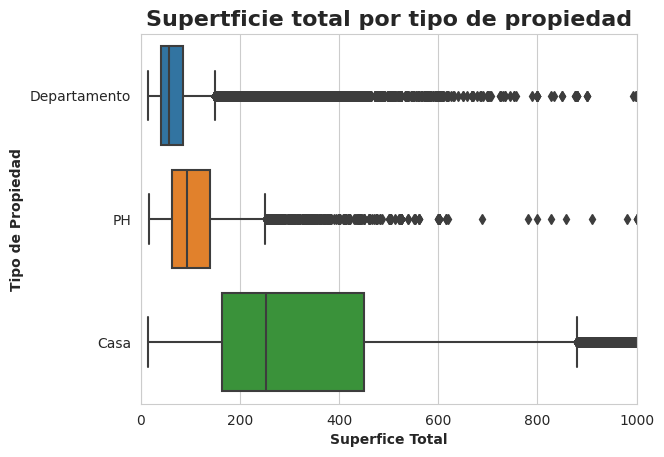

In [ ]:
sns.boxplot(data=df, x='surface_total', y='property_type')
plt.xlabel('Superfice Total', fontweight='bold')
plt.ylabel('Tipo de Propiedad', fontweight='bold')
plt.title('Supertficie total por tipo de propiedad', fontsize=16, fontweight='bold')
plt.xlim(0, 1000)
plt.show()

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

In [ ]:
alquiler.property_type.value_counts(normalize=True)*100


Departamento   80.87
Casa           14.74
PH              4.39
Name: property_type, dtype: float64

In [ ]:
venta.property_type.value_counts(normalize=True)*100

Departamento   63.33
Casa           29.59
PH              7.08
Name: property_type, dtype: float64

In [ ]:
for tipo in df['property_type'].unique():
    print(tipo)
    print(df[df['property_type'] == tipo]['operation_type'].value_counts(normalize=True)*100)


Departamento
Venta      75.99
Alquiler   24.01
Name: operation_type, dtype: float64
PH
Venta      86.68
Alquiler   13.32
Name: operation_type, dtype: float64
Casa
Venta      89.03
Alquiler   10.97
Name: operation_type, dtype: float64


In [ ]:
import plotly.express as px
sns.set_style('whitegrid')
fig = px.box(df, x='price', y='property_type')
fig.update_layout(title_text='Box plot de Precios por tipo de propiedad',
                  xaxis_title='Precio', yaxis_title='Tipo de Propiedad')
fig.show()


(0.0, 1000000.0)

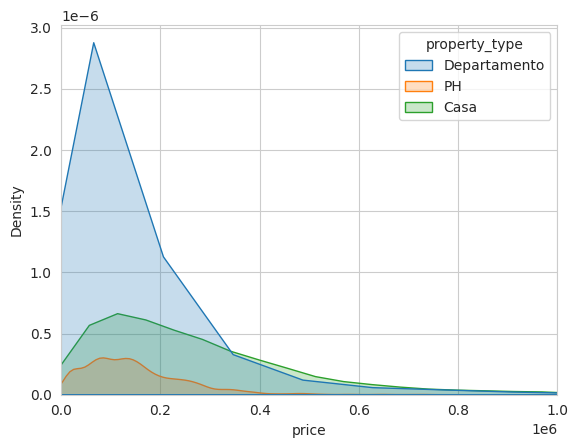

In [ ]:
sns.kdeplot(data=df, x='price',hue='property_type', fill=True)
plt.xlim(0,1000000)

### **Análisis Bivariado**

In [ ]:
from pandas_profiling import ProfileReport
import pandas_profiling

ModuleNotFoundError: ignored

In [ ]:
df.describe().T

In [ ]:
#Data Profiling
profile = pandas_profiling.ProfileReport(df)
profile

In [ ]:
# Relación entre características físicas y precio
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(x='surface_total', y='price', data=venta)
ax.set(xlabel='Superficie total', ylabel='Precio',
       title='Relación entre superficie total y precio de las propiedades', ylim=(0,4000000), xlim=(0,2500))
sns.regplot(x='surface_total', y='price', data=venta, color='red', scatter=False)
plt.show()

In [ ]:
# Relación entre características físicas y precio
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(x='surface_total', y='price', data=alquiler)
ax.set(xlabel='Superficie total', ylabel='Precio',
       title='Relación entre superficie total y precio de las propiedades', ylim=(0,400000), xlim=(0,500))
sns.regplot(x='surface_total', y='price', data=alquiler, color='red', scatter=False)
plt.show()

In [ ]:
g = sns.FacetGrid(alquiler, col='property_type', col_wrap=4)
g.map(plt.scatter, 'surface_covered', 'price', s=3)
g.set_titles('{col_name}')
g.set(ylim=(0,250000), xlim=(0,200))
plt.show()

In [ ]:
# Separación de variables numéricas para ver correclaciones
int_cols = df.select_dtypes(include='float')
int_cols

In [ ]:
# Correlación entre características y precio
corr_matrix = int_cols.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación', fontsize=20)
plt.show()

In [ ]:
sns.scatterplot(data=df, x='bedrooms', y='rooms')
sns.regplot(x='bedrooms', y='rooms', data=df, color='red', scatter=False)
plt.show()


In [ ]:
sns.kdeplot(data=df, x='rooms', color='red', label='Ambientes')
sns.kdeplot(data=df, x='bedrooms', color='blue', label='Cuartos')
sns.kdeplot(data=df, x='bathrooms', color='green', label='Baños')
plt.legend()
plt.xlabel(None)
plt.title("Distribución de las variables 'rooms', 'bedrooms' y 'bathrooms'")
plt.xlim(0,10)
plt.show()

In [ ]:
fig, ax = plt.subplots()
sns.kdeplot(data=venta_caba, x='surface_total',
            color='red', label='Superficie total', fill=True, bw_adjust=10)
sns.kdeplot(data=venta_caba, x='surface_covered',
            color='blue', label='Superficie cubierta', fill=True, bw_adjust=10)
ax.legend()
ax.set_xlabel(None)
ax.set_title(
    "Distribución de las variables 'surface_total' y 'surface_covered' en CABA")
ax.set_xlim(-10, 10000)
plt.show()


In [ ]:
sns.kdeplot(data = venta_caba, x='price', y='surface_total', cmap='Reds',fill=True,bw_adjust=0.5 )
plt.xlim(0,2000000)
plt.ylim(0,1000)
plt.show()

In [ ]:
sns.kdeplot(data = alquiler, x='price', y='surface_total', cmap='Reds',fill=True,bw_adjust=0.5 )
plt.xlim(0,80000)
plt.ylim(0,1000)
plt.show()

## **Predicciones**

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [ ]:
df = df.drop(['start_date', 'end_date', 'l3'], axis=1, errors='ignore')

In [ ]:
ohe = pd.get_dummies(df[['l2', 'currency',
                     'property_type', 'operation_type']]).astype(int)

In [ ]:
df_nuevo = pd.concat([df.drop(['l2','currency','property_type','operation_type'], axis=1),ohe], axis=1)
df_nuevo

In [ ]:
X = df_nuevo.drop(['price'], axis=1)
y = df_nuevo['price']

### Reducción de variables

#### Feature Selector

In [ ]:
import sys
import joblib
sys.modules['sklearn.externals.joblib'] = joblib

#Librerias
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
# Sequential Forward Selection(sfs)
sfs = SFS(LinearRegression(),
          k_features=10,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 0)

In [ ]:
sfs.fit(X, y)
k_feat = list(sfs.k_feature_names_)

k_feat

In [ ]:
X_sfs = df_nuevo[k_feat]

#### K Best

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [ ]:
kbest = SelectKBest(score_func=f_regression, k=10)  # selecciona las 10 mejores características
X_best = kbest.fit_transform(X, y)

selected_features = kbest.get_support()
selected_variables = X.columns[selected_features]
print(selected_variables)

#### PCA

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=15)  # selecciona el número deseado de componentes principales
X_pca = pca.fit_transform(X_scaled)
X_pca

### Modelos de regresión

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1)


#### Regresión Lineal

In [ ]:
metodos = [("X",X),("X_sfs", X_sfs), ("X_best", X_best), ("X_pca", X_pca)]

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import mean_absolute_error

for metodo_nombre, metodo_datos in metodos:
    # Dividir los datos en conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(metodo_datos, y, test_size=0.2, random_state=1)

    # Entrenar un modelo (por ejemplo, una regresión lineal)
    lr = LinearRegression()
    lr.fit(X_train, y_train)

    # Calcular el coeficiente R2 en el conjunto de prueba
    y_pred_lr = lr.predict(X_test)
    r2 = r2_score(y_test, y_pred_lr)

    # Imprimir el resultado
    print(f"R2 para {metodo_nombre}: {r2}")
    print(f"MAE para {metodo_nombre}: {mean_absolute_error(y_test, y_pred_lr)}")
    print(f"MSE para {metodo_nombre}: {mean_squared_error(y_test, y_pred_lr)}")
    print(f"RMSE para {metodo_nombre}: {np.sqrt(mean_squared_error(y_test, y_pred_lr))}")
    print(f"RMSE log para {metodo_nombre}: {np.log(np.sqrt(mean_squared_error(y_test, y_pred_lr)))} \n")

In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Calcular la línea de referencia (relación lineal perfecta)
# min_val = min(np.min(y_test), np.min(y_pred_lr))
# max_val = max(np.max(y_test), np.max(y_pred_lr))
# ref_line = np.linspace(min_val, max_val, 100)

# # Graficar y_test vs y_pred con línea de referencia
# plt.scatter(y_test, y_pred_lr, label='Valores reales vs. predichos')
# plt.plot(ref_line, ref_line, color='red', linestyle='--', label='Relación lineal perfecta')
# plt.xlabel('y_test')
# plt.ylabel('y_pred')
# plt.title('Comparación entre y_test y y_pred')
# plt.legend()
# plt.show()

In [ ]:
# # Gráfico de residuos
# residuals = y_test - y_pred_lr
# plt.scatter(y_pred_lr, residuals)
# plt.axhline(y=0, color='red', linestyle='--')
# plt.xlabel('Predicciones del modelo')
# plt.ylabel('Residuos')
# plt.title('Gráfico de residuos')
# plt.show()

#### Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
for metodo_nombre, metodo_datos in metodos:
    # Dividir los datos en conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(metodo_datos, y, test_size=0.2, random_state=1)

    # Entrenar un modelo (por ejemplo, una regresión lineal)
    dtr = DecisionTreeRegressor(random_state=1)
    dtr.fit(X_train, y_train)

    # Calcular el coeficiente R2 en el conjunto de prueba
    y_pred_dtr = dtr.predict(X_test)
    r2 = r2_score(y_test, y_pred_dtr)

    # Imprimir el resultado
    print(f"R2 para {metodo_nombre}: {r2}")
    print(f"MAE para {metodo_nombre}: {mean_absolute_error(y_test, y_pred_dtr)}")
    print(f"MSE para {metodo_nombre}: {mean_squared_error(y_test, y_pred_dtr)}")
    print(f"RMSE para {metodo_nombre}: {np.sqrt(mean_squared_error(y_test, y_pred_dtr))}")
    print(f"RMSE log para {metodo_nombre}: {np.log(np.sqrt(mean_squared_error(y_test, y_pred_dtr)))} \n")

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
metodos2 = [("X",X), ("X_sfs",X_sfs), ("X_best", X_best)]

for metodo_nombre, metodo_datos in metodos2:
    # Dividir los datos en conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(metodo_datos, y, test_size=0.2, random_state=1)

    # Entrenar un modelo (por ejemplo, una regresión lineal)
    rfr = RandomForestRegressor()
    rfr.fit(X_train, y_train)

    # Calcular el coeficiente R2 en el conjunto de prueba
    y_pred_rfr = rfr.predict(X_test)
    r2 = r2_score(y_test, y_pred_rfr)

    # Imprimir el resultado
    print(f"R2 para {metodo_nombre}: {r2}")
    print(f"MAE para {metodo_nombre}: {mean_absolute_error(y_test, y_pred_rfr)}")
    print(f"MSE para {metodo_nombre}: {mean_squared_error(y_test, y_pred_rfr)}")
    print(f"RMSE para {metodo_nombre}: {np.sqrt(mean_squared_error(y_test, y_pred_rfr))}")
    print(f"RMSE log para {metodo_nombre}: {np.log(np.sqrt(mean_squared_error(y_test, y_pred_rfr)))} \n")

In [ ]:
data = df.values

In [ ]:
data[:, :-1]